# 0. Import Data

In [ ]:
!pip install pandas

import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('Churn.csv')

In [ ]:
df

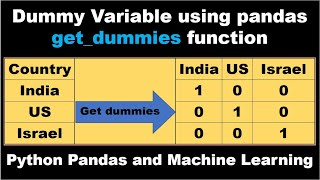

In [ ]:
X = pd.get_dummies(df.drop(['Churn', 'Customer ID'], axis=1))
y = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [ ]:
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
y_train.head()

# 1. Import Dependencies

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# 2. Build and Compile Model

In [ ]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

# 3. Fit, Predict and Evaluate

In [ ]:
model.fit(X_train, y_train, epochs=200, batch_size=32)

In [ ]:
y_hat = model.predict(X_test)
y_hat

In [ ]:
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

y_hat

In [ ]:
accuracy_score(y_test, y_hat)

# 4. Saving and Reloading

In [ ]:
model.save('tfmodel')

In [ ]:
del model 

In [ ]:
model = load_model('tfmodel')